In [1]:
import sys
sys.path.append('..')

from utils import get_task_dataset
from tqdm import tqdm
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import json

/nlp/scr/kallini/miniconda3/envs/charlm-env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def print_colored_string(chars, bools):
    # Define ANSI color codes for red and green
    RED = '\033[91m'
    GREEN = '\033[92m'
    RESET = '\033[0m'
    
    # Loop through characters and booleans to print each character in the appropriate color
    for char, boolean in zip(chars, bools):
        if char == ' ':
            char = '_'
        if boolean:
            # Print in red if True
            print(f"{RED}{char}{RESET}", end="")
        else:
            # Print in green if False
            print(f"{GREEN}{char}{RESET}", end="")

def print_deletion_patterns(model_name, task, language="en", seed=28, ckpt=3000):
    eval_dataset = get_task_dataset(task, "test", iterable_dataset=True)
    json_file = f"deletion_patterns/{task}_{language}/{model_name}_seed{seed}_ckpt{ckpt}.json"
    with open(json_file, 'r') as f:
        deletion_patterns = json.load(f)

    for i, _ in tqdm(enumerate(eval_dataset), total=len(deletion_patterns)):   
        # Get decoded tokens and deleted spans
        decoded_tokens = deletion_patterns[i]["decoded_input_ids"]
        is_deleted = deletion_patterns[i]["deletion_mask"]

        if i < 50:
            print_colored_string(decoded_tokens, is_deleted)
            print()

        if i+1 >= len(deletion_patterns):
            break

def plot_deleted_tokens(deleted_counter, kept_counter):
    # Combine the counters and calculate percentages
    tokens = sorted(set(deleted_counter.keys()).union(set(kept_counter.keys())))
    deleted_counts = np.array([deleted_counter[token] for token in tokens])
    kept_counts = np.array([kept_counter[token] for token in tokens])
    total_counts = deleted_counts + kept_counts
    deleted_percentages = deleted_counts / total_counts * 100
    kept_percentages = kept_counts / total_counts * 100

    # Plotting
    plt.figure(figsize=(14, 7))  # Adjust the width and height as needed
    bar_width = 0.5
    r = np.arange(len(tokens))

    plt.bar(r, kept_percentages, color='green', edgecolor='grey', width=bar_width, label='Not Deleted')
    plt.bar(r, deleted_percentages, bottom=kept_percentages, color='red', edgecolor='grey', width=bar_width, label='Deleted')

    plt.xticks(r, tokens, rotation=45)
    plt.ylabel('Percentage')
    plt.title('Percentage of Tokens Deleted/Not Deleted')
    plt.legend()

    plt.show()

def display_deleted_tokens_plot(model_name, task, language="en", seed=28, ckpt=3000):
    eval_dataset = get_task_dataset(task, "test", iterable_dataset=True)
    json_file = f"deletion_patterns/{task}_{language}/{model_name}_seed{seed}_ckpt{ckpt}.json"
    with open(json_file, 'r') as f:
        deletion_patterns = json.load(f)

    deleted_counter = Counter()
    kept_counter = Counter()

    for i, _ in tqdm(enumerate(eval_dataset), total=len(deletion_patterns)):   
        # Get decoded tokens and deleted spans
        decoded_tokens = deletion_patterns[i]["decoded_input_ids"]
        is_deleted = deletion_patterns[i]["deletion_mask"]

        deleted_counter.update([token for token, delete in zip(decoded_tokens, is_deleted) if delete])
        kept_counter.update([token for token, delete in zip(decoded_tokens, is_deleted) if not delete])

        if i+1 >= len(deletion_patterns):
            break
        
    plot_deleted_tokens(deleted_counter, kept_counter)

## Simple Vowel Removal Task

100%|█████████▉| 1000/1001 [00:00<00:00, 21572.20it/s]


#CMzBnJEvuvYDyByglhmavEwEfQPOvUCnqNwSVGtgikvIDxJVNuxegraIZxgGWB</s>
#dGBFtzYKSjSmBQsPdVZtdqvLaitCfWrFZOlavDMFQRnxEvdjrHwlabcdmPEQOd</s>
#pQPesylWmoTpMqvmsIAWVQGEWUxASgsCxjnJHwCNoCcLOEsdeZrIHlWHcvXSbM</s>
#rHcDXXoOysIiAjnqzmDLgwhmaXbaRYGwEOfAFYBSXRiZLNqiFhbBrDjedNdgCa</s>
#GCeHQgguewnCiknBRlzFoRoOOLPBTzsnWSFfgxtbRHhbXpHETRkjBnSuCPHFdX</s>
#sKtvpYbYMNyZXiHeQZlAwERsuJZJXPkPWfkPWkCPxVqSBaCDjadgmbRxxxqezl</s>
#prwfiHlJxKgmNwdoQvuSBuoYydjrQMmnodCZmVXTOGhGVOfeWOeZAcxLqSNGRR</s>
#vlTdHzBNzxYZwkPRZocfyUaIuxuTpmotPzNBIqYkVmPyYcLJlflDorrDOViuck</s>
#VcdaPbVboDNDbjoPqmxVrbmFNDbqTUnsLjUjHONCCLbWPQiUqmLANOSrprfgQe</s>
#aiRsobhOIqKIaPZWhvKYgjqMXLhvDPWLSTEioaRDsCBNIFcKINbUKtTEBtKDAL</s>
#YFQHAKUmVpYFlGwolrWPqfsdKaevUCmjGQrQHfXIfqYyNdvpGkplVQhZUIpdkn</s>
#jovEffBXomHvRjTNVGohMaGUVCurBauUkVyTAsiTNuRTrVfNdxXMlqEDUizEjw</s>
#RCNqqROwFALSmtoxDxrPLGGcVhAJgRxPBuLDniijRPXcLJVhouUyFmEUEBXvMk</s>
#JOZHlJENdyWrAPlueMGcwhWRHuwhsvoxMzZeaiqzAuHvFAHotcCatdoEquVuvr</s>
#YoEYUTgRebzsgjGyzwGppTibYXYqpKTinvWsEJhINjxSIiL

100%|█████████▉| 1000/1001 [00:00<00:00, 27486.69it/s]


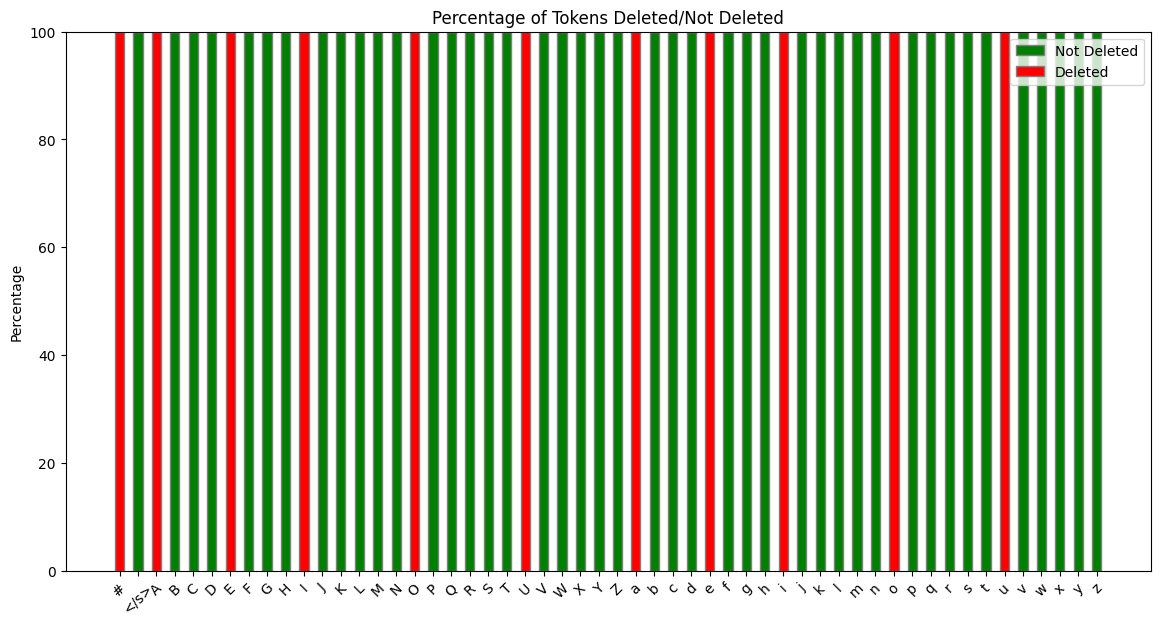

100%|█████████▉| 1000/1001 [00:00<00:00, 20950.88it/s]


#LepJYbaXGnUQrTCbEIwwjwZQMZieiWgLewexdJzZuIWXrLRtAxBNciHLWhgqET</s>
#LuuRYfYXDSVQYOAQYueKtflLQgEGZRibxuPeprCqTfjzIVMioNuAmBdAtMOPck</s>
#XXdxEyhgoriltaMeoqQEJCENhLrtVIDABVLDBZMcZSlCMiivOAypzwILwwjiNs</s>
#XXccwHMvpmRYBYGUSDEHksZqBLyQOXDRCCWXXJTWVtoBDJWCapenSUVRgcDCil</s>
#OExJNSJMCJJIpcxbwBWaAnpcahLNBIseXgIxoFCMWyUISRlEAlKyqNlCINXpMY</s>
#pPIwyippXrITFSXWNOpAGRRhPlwBNYrcKhQVLflpYuNoaRPMXSpZxygkCXmwCJ</s>
#CYfRdwDsMkujKICVWBEXTuZSwsKCrjmlAdJtfxENGBZppytWrnASHZQAvJEObW</s>
#PxZWrpvcKaRameNjLdDOAlDMKDOQidCVySAiqtRdYAGCXiCrvArGmsbeMENUcG</s>
#UHDUGlQAwANoilPNTFAKjHoByCUAnUSZTBHmXvoHplhMOdIZDQLsHuqAxPvDBQ</s>
#SnzDVWRbsKQSpfdKTUznXmUHJIsoslzcxHttFZIdvjnyMiYZuTAbxwmcaJvqiN</s>
#bCcsQPvgLTWCkYXiEbAwzmileUuBOcJcZOCHGPJVIAzTuGfnZBcfvBHmtSQAFS</s>
#MqCWEmdgimkZNfgasJPkhZlhkJSFajOXZCzRoheJBiwlhvWWrFadFpvKFkDWbw</s>
#iAJElparrhNLjwoFtNRQDticBwJjPclLBIdATRPxsjOJzrnzMoVNkBRTKUbKMB</s>
#YoEYUTgRebzsgjGyzwGppTibYXYqpKTinvWsEJhINjxSIiLziQEmyymgkPzuzR</s>
#bClIbmhfIJdcloyLohqaOYWwdwJGRtURToYqhFxnCYYfCzd

100%|█████████▉| 1000/1001 [00:00<00:00, 26005.87it/s]


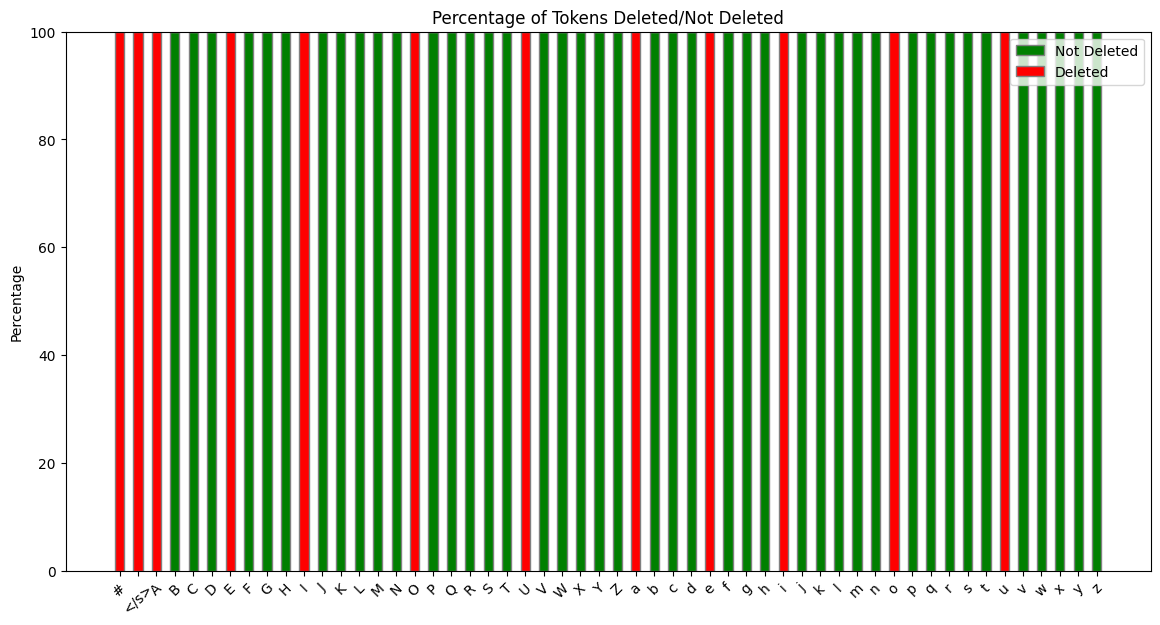

100%|█████████▉| 1000/1001 [00:00<00:00, 15341.39it/s]


#FFcxLhYnGgpbnznAHmEDecPngbVXtGFoXvAvNCPsdSIoOVBwdMiovdtNLRkImP</s>
#JUEbAEStSzpFiAXNNqDNZdLzuihJMxyHKDJZaYgwlhXtefXkQHjxlmqjZimSHQ</s>
#wIGJfIJALHVZDNckDEbsMgrNneNOhKKjZSnskDYUUnUkqfhjFtQLBdJsXPTRuj</s>
#sZZowAlEZIaKtooZyeNGdFyLGpitnxEqJtFQwHnZxotliJUBQvFVkHIbVdshir</s>
#ckbsEjNSaoeoLCMNShaqJAMiXtpQkYEPuvCvzAJEswTukcNTHkuZjtvqGuNgkf</s>
#hCRCfNPrSJucnNXztpaGEDHCpFXNdGwdiLtGWAGZcYUHgROFXSykgYeWVtMJPG</s>
#NCNIRQhHqUKdiySwXszulBCqSoahKZXVFgJZPSSgfNbtGzkgkcAhvFyVIjBLKi</s>
#RQkTBmsHKxRzrZjEBNlxXiRyuHRYVaEbuUjYrFWyjjkabjCQJQkIhhjcEtPxYW</s>
#eYYZdLqnLVzmjRSPKXrOHEdUpZmaNSSNzidpRUWyTfQUMOWpSVvmAsmXoUQxbf</s>
#AMUdvjqGBsQTLbvBfGGjyUVSoWdTvpQJzDZYaxffVOCqvtwbNHjYYfkocsicnS</s>
#dBKAzwLvXsLValoqcNaMkzxoGCrozIptJtaCxQsZGNmCaRIxZPyqpoairaUFMK</s>
#mzwZVCzYpFDEZdDVIuObdSRPgxjTGHYrQWPairQHeGzPKDHjqiZEWkpaJNoVPt</s>
#petcUVVefHeQEyxaFzCSrblfWERvrClJyjaaqteZMUIdmBVFuJelHutMgUFIdo</s>
#KqopSdbCeiTZFaythoKupKhvytJTkgDhKkNGWWbTQFMMyqMcHMrhAObzURUZNF</s>
#XfYbVhbFxIMNMNqoqaSmgvyPerNmMuhULjhjQSQepsAAkcV

100%|█████████▉| 1000/1001 [00:00<00:00, 26173.50it/s]


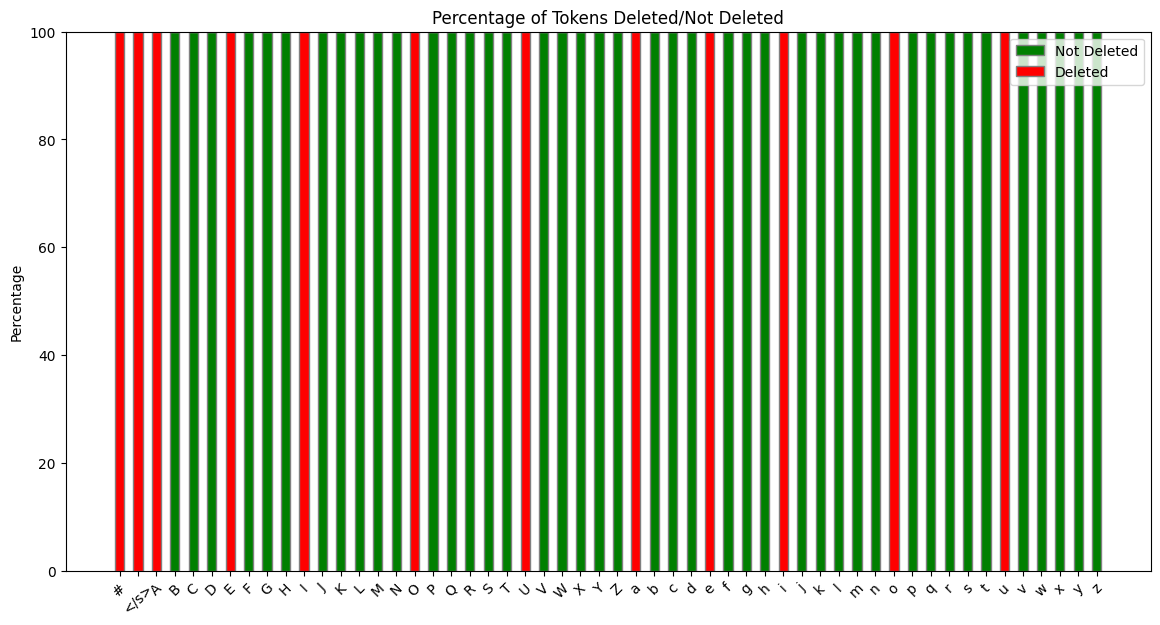

In [3]:
pctrl_and_seeds = [(10, 348), (20, 53), (30, 11)]
for pctrl, seed in pctrl_and_seeds:
  print_deletion_patterns(f"simple_vowel_removal_pctrl{pctrl}%", task="vowel_removal", seed=seed, ckpt=30000)
  display_deleted_tokens_plot(f"simple_vowel_removal_pctrl{pctrl}%", task="vowel_removal", seed=seed, ckpt=30000)

## Contextual Vowel Removal Task

100%|█████████▉| 1000/1001 [00:00<00:00, 38795.20it/s]


#ILiKneyxoYuduzUXEREFKaZiFTAqZanEjoJEQIxAsUsujiLOKUGXUfovdEHEqF</s>
#vSVuwuetTZuuemofaOXihepyJOJVAGMWitExtiOVGYSDEcaNzNOLOmEPPIXBEp</s>
#GNefinOSOtomEvARMqAKqojpubdGBziyOmerTaMoCoJuwUkTOyebeHATQeErUY</s>
#OWZliZDabaJAQbxVHfLSLZHAyXpdsWtSrTCgcriSGNGiwEJrhcBurBBFATNzxy</s>
#xVoOlIyIBUxeDugOOPENoCuNAXguSsUlolMIwUTIjsUqeTEDWUTMiTbeZniSIl</s>
#REKTiQUwIXiBOGouJABsOLIYivInvOdpoRakOXmIdAXALIcigGOcROZIiHutEe</s>
#xgURzuFXENUqOKLIDOSPEfYULMoWosOFulaKoOsIwpAvPEmabzItuTiZuCApof</s>
#caHeyOloYUebiseKFuzQITIxpeRIpOZIxDafdUrePEWoBexICihogoJEQIcgug</s>
#UcpbTjdAZaJNksJfONcuQdGzKwHhhXrZsNaWcOaRxVXNVOhWjttgMNUkvksrsY</s>
#WxelEZuDOTOSbukuiLosyevHoBivImaNkaObiyOUcewQamaCEDdAKEQgUtaWUD</s>
#GInItorOkADLiCOpzoaHoGEtACavifOgOqIkoAjorErImObmOwoTapISAqEKeO</s>
#PXuMuszEkotiMIYeIWASiWEKEqOFAqIQigECejACAfoFuqBIriWulONUggoCiH</s>
#slOrtibxiCumoDAFAemeTAdEhAholEgUtEvUvetEgOkixaFedUkiBONToGOkUR</s>
#XrAOeDeupwZDeJxUVTIlUPYRWLqlRNeWezOAOYCkEbYfJZBsabWESqgTdxkUJY</s>
#BuvgEZVaFESeHAPAZMaciDEHOGDeveXIgUSafuBaZmIZNAs

100%|█████████▉| 1000/1001 [00:00<00:00, 38126.57it/s]


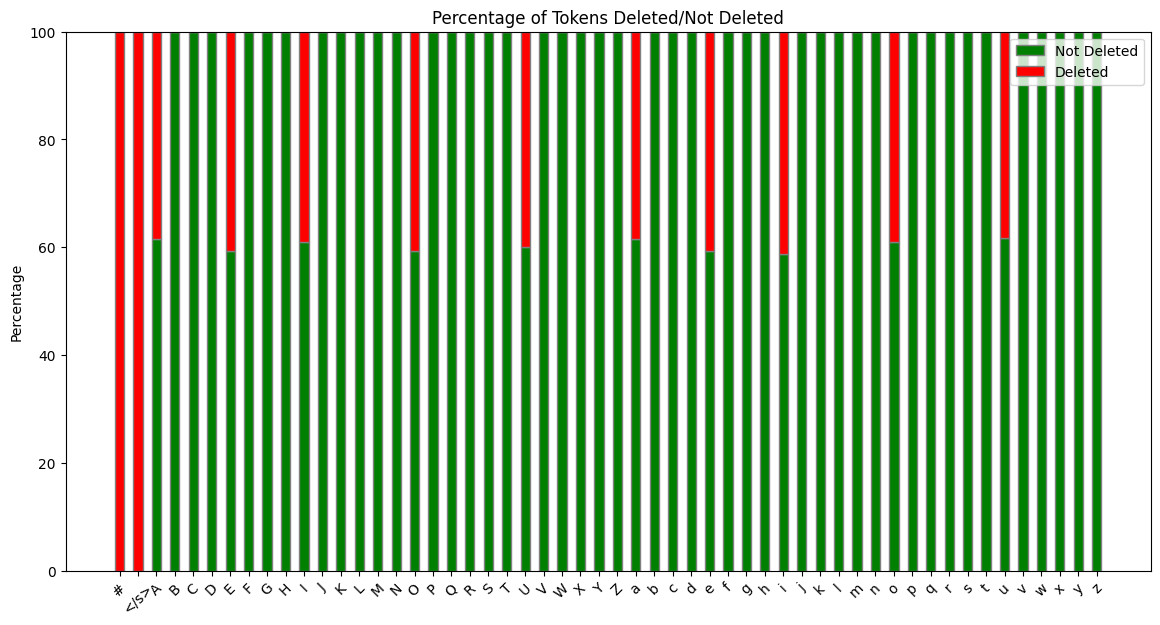

100%|█████████▉| 1000/1001 [00:00<00:00, 38305.20it/s]


#FOwZhLiXEwozEGvaxqEKkeFadkIVOlDAceClEbONEqauWOxDhuXIzAtvoGUjUx</s>
#KuydineHcAdLOyYUbIvtILTETuozikIACiukaqoketutefibOyOnetibhEYoUd</s>
#MBabaDXawIBoQArAaQutONetUbJEWEyMITAJOmaFUKEkweBOfQuRESniJurAVt</s>
#ZaampEslAnlEAtaPoQOBQUXukudaeyeZizuHEnrnRuBcoYjEcihODAIWArewuU</s>
#PiraSuucEJaWUdoxuSICanQOCoTIwEMavaReQaCVurazifanEwODDiNUPoggUN</s>
#SMkuxoiMIgEHobUutEXJIhITuCUxojPInPOzatOyIVAWuziBokCoyAPAPuXuWd</s>
#QoMEZTtxEBuPUtZjOCBHfidUMaRBokaIZGaDUcFEXawwEfUViJathiKICAMaXC</s>
#wUWOzirmOkEPyKKMIMuXutUVlEZarMIIyevBblqjPignVIzIvIMafxHEFErIgL</s>
#hvOfIURURCIlQEZUgLEAKROEFYoZuWaTVAfxixQIcsLudotrSBFEQIVgMaiEll</s>
#WQkafPasAPAqxOXEBwbigoCEoSAGihVMIjIPgOJohuihumosiMyODBaRrEqOLW</s>
#EXayesmAjalWAnahXEtaQaqERYUgiDxIhObulanOGjUdGOZiRIynUwucOVuCuw</s>
#sItiLfOYUrAruoUvTNllLCPJQETtUfoluwtuLyiYNRoSGxqwWRlPFUIGwXfvXQ</s>
#veGezotIlsiDibceWbIWohVucItotdeTijAjOZrURUPomTEifeQBoeMeOpehow</s>
#YUJOjozukBOQZiSESUcRisIreCeUbISyITAqHIHEaWIldiTyOOWolOGOviwJue</s>
#HgAvjateTguCACIzAmOhItVijCAYiLofOClUSEkOicepaRo

100%|█████████▉| 1000/1001 [00:00<00:00, 49696.13it/s]


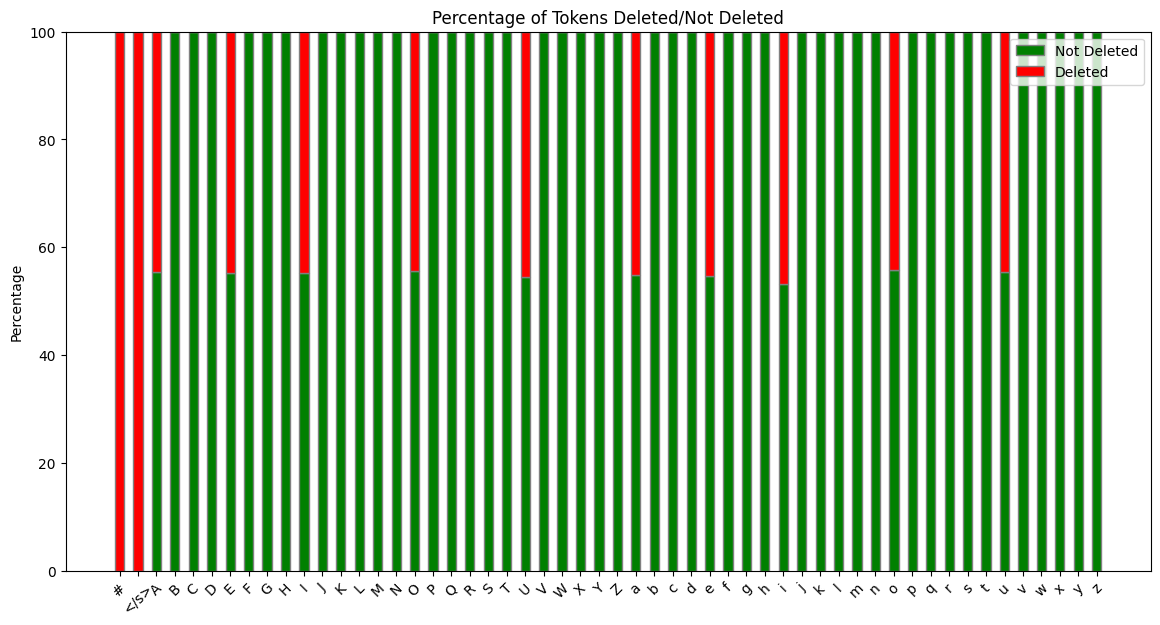

100%|█████████▉| 1000/1001 [00:00<00:00, 45721.46it/s]


#YhEqAJILiMOAKUVoSIfCOnApSILAgAWFaBiuvAvNuzEhObAHIPUGBAJJIJeKOA</s>
#ytSGARJOBNppNjsESOaJqgaGnaOHVFjXhlWEXawXOaEipIxIBZLGPubKgnOyqK</s>
#votOZJIdyaTpeWaHODOXucopKEfLoWAJAsnOQgANnNOVLovaYePaLqJAbACABs</s>
#XxrtLvbAvoInINUcOpAkSZjiqummAmlPOelVBEoQjqojZuUNYoAYpchAxcWObV</s>
#odWYjmggkeNHhDZUSHMRGyeyruVJASupyoxFASEraZZmRcoqhQRIZaNeMosmAP</s>
#tEZaQUFaliKiwJUmuGogefJaHUqItEPOhoHazappECIyaYUwulmovSaQgEcdaA</s>
#gOjitOEsSoMhVofaqiSaNzSmpILRccMXgTarvURmbrOsDmolcExlWPXiKYToUk</s>
#jogeqaLukEyezXODiTNeTAFiZeKaCtikokEcxOnUgWAlUgopeKQihAraRALAmk</s>
#gAduUREfrolfIqeCubDiMEWUTKuMeXiMAtoJoMipIhEFejabUXIsuQeWxAiNeP</s>
#TxRaySrLZiKjCCwEVguyePZlkeMxRRDUADOlfHUhOEogcmEXaJuOBAbaEnOCAS</s>
#roLROyUCcJEmADeMEncKeSMTuipfoiWyQuqPuyLjOdUxOMeCosSURixDIZiGoP</s>
#awePNAkuKalNuneaKiRaRUvatYiUTeXsUBVPaKtotajECucMUFMOvaMeZuYUjh</s>
#dxEDiSBrjHFeYphXKAosTspVtyLlMiKQyNlPxeZxarTQtZVNRqxYXhEWVfUuAi</s>
#liNHoWIWIWOnkqPUFTeRNbPwnOofgaYaBxtKbhJAAzUhubWuogVNAJvPzGgdxZ</s>
#XVVtaNUKkyUdCOvkUMyeYImkIYCEjXbvIhEWQEZTErEuLOb

100%|█████████▉| 1000/1001 [00:00<00:00, 49561.07it/s]


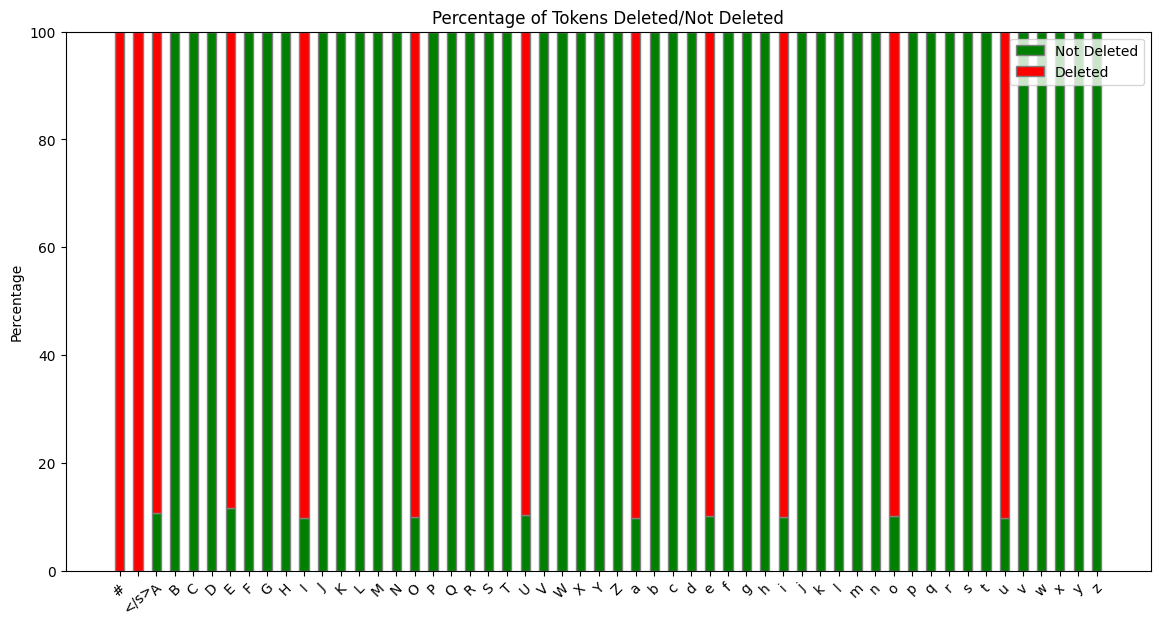

In [4]:
pctrl_and_seeds = [(10, 33), (20, 81), (30, 24)]
for pctrl, seed in pctrl_and_seeds:
  print_deletion_patterns(f"contextual_vowel_removal_pctrl{pctrl}%", task="contextual_vowel_removal", seed=seed, ckpt=30000)
  display_deleted_tokens_plot(f"contextual_vowel_removal_pctrl{pctrl}%", task="contextual_vowel_removal", seed=seed, ckpt=30000)

## Merge Task

100%|█████████▉| 1000/1001 [00:00<00:00, 39416.08it/s]


#pTBFkEMbhwhXtXxVoVibABCShusjcVwUbxjuNjGgKxXYvBccByUsWABCiBbeBu</s>
#MlJCXyfInRxHBTXHdeoAElABCABCNIQqTOKDAUABClnABCTzPuIUuxzicFBkmi</s>
#IqRABCVABCAYXyZBbmZBKVnyEGABCIPmLhSQABCFffHABCABCyKmMSMJxeqKpA</s>
#yrrABCuHfhCzIMeciiYiMLWzZyHnPvgBPzjNuiovthEuTPSeuHdqoqUyTefzOf</s>
#AjMeHgABCyUKyJgVjhOKHIpvCsABCCSABCzABCKNrNmrbjTABCSksABCUrYzkP</s>
#PABCOyCFuGBKyzwVYmCkxABCtTTZjMhLcrwJxxvWQMABCxWABCwSiGUBwylius</s>
#vSpABCpGZZCmdDrfaseENtoamqLdyYLboSLsDUVHxgMgHUABCSPSbaABCVsdUn</s>
#njakQcbABCgLpfVktqABCuGYdHvIhNwIVpzeEXqezXaABCABCDqnaKATHTABCq</s>
#ictQoAABCSBABCVblvAETPHKABCgABCuMoABCPEABCABClUABCqdYhomZVEdMg</s>
#yvBJPkbRoVHOCGjdABCABCoEQGEAmyAVnYABCwlqeCERXdXblckABCABCcBKJa</s>
#yABCQsABCABCxABCBHeHkmdWgXPzcABCcrpfXMuPOCeTOMkABCrABCEEDIWSHU</s>
#qoPvKWTHlPBFTABCcilgXoTWluyFilfDKAgABCFmQFYABCcOFmyTTtnYLFkliN</s>
#cIyDNyDoHVpuIABCABComYRqfRABCYoABCKhBPusbOJpEIxABCOkGnEQyABCjl</s>
#CGwvzudnABCAOxOXcLABCVucbJxxAABCiizjABCzujhcwvcqABCPFBsTABCVjn</s>
#emMIaanIIMlXnbrUABfeQPDnftIhhMNWlBPABCQexPSdwoS

100%|█████████▉| 1000/1001 [00:00<00:00, 47251.24it/s]


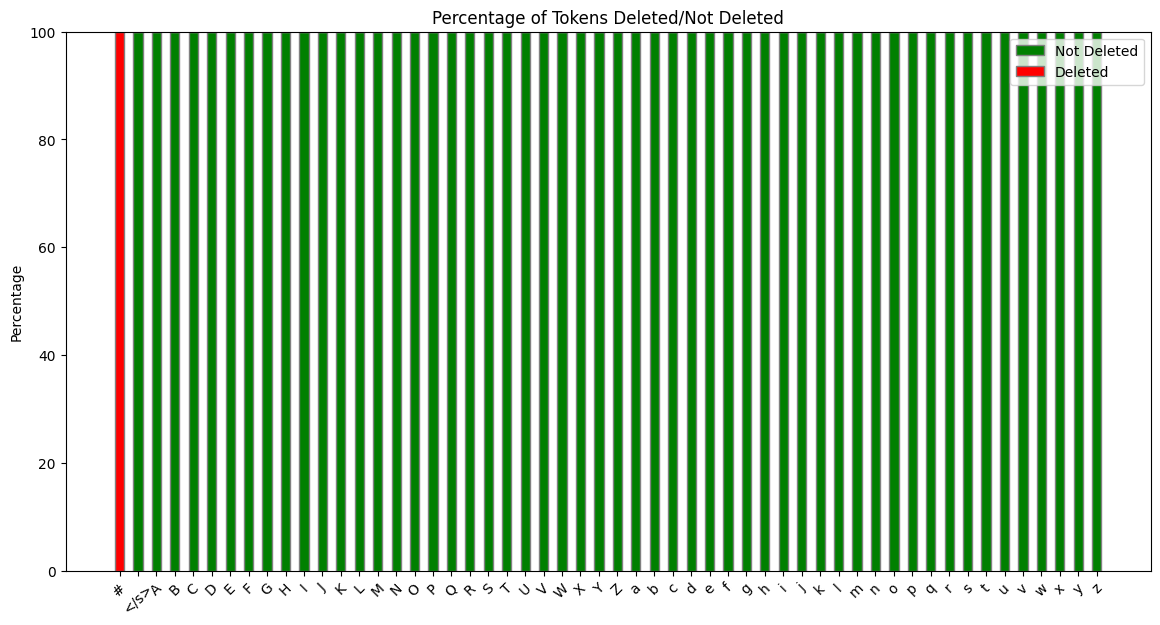

100%|█████████▉| 1000/1001 [00:00<00:00, 27391.37it/s]


#CySgvjelyZhgKrTlaPABCBTtABCABCaNbcKxfEgyXdokFOLDAjwbeqtUBcABCg</s>
#MTpHFrABCxwABCjwABCitABCqABCpABCreIDMncdEtUABCABCCmfMABCoYiJSQ</s>
#SKJABCnMamqBcABCABCsQLRABChqaABCTeVWABCcuBViefxqwvuABCoGABCqMB</s>
#xemxHQpABCzWMhcABCkSlEYCcIjdFpduQKIrTABCyLuABCmSABClrEhABCABCG</s>
#wksBnyArRUkVjGCpTmpdebABCaKCaABCRWdyFFNEdiWABCIsnzqijOfABCNzeH</s>
#lvYfwgHOABCtDPxdsvqVNMMKbnxGLABCAljwMVZeABCyiVASSzdkgABCFpABCW</s>
#sSOBdNcmsveLOFWEQhFmZbIxvLnmcOtkeEwwureABCGOrNvKyRzKhNOxyblcql</s>
#ABCDpqfWtIZVdsUTSEtzPNyrRUhKTracnxigmXDcMLcABCABCSRsPcFvqorpjH</s>
#VdABCmroEzRCZABCzpcnTyyVNRQczkaLsQIqoOZrZPRksaZpABCgMZDpKwABCg</s>
#PAJgFpABCbJDmFVBoJHohTpVuHSjBSABCLtvJVQstnVABCLEePDOzdSFoRsyxY</s>
#CnEvABCHzYyiMABCxyOYHSiFpFzyaqVjyDnaNvCihABCsKtFUnVrTapYzObsmI</s>
#dRJABCWFYZABCJKeKCmABCskhfRzRABCWCMwhvCyKWReovTABCcVAhvblMFPrA</s>
#aUsMqdABCBJEeAZVqaUGveXbJhlYdaAsAFMjnABCcFABCaNYpOGUzidkIDVmXe</s>
#tABCOeODmABCsYSYToGlCWvUABCoCyJABCCUABCABCUABCbsaUvggiCFRMwduP</s>
#lSojYLmQDaunikpHQLodYEABCABCLRbYRgGrbtGHcRiWxAT

100%|█████████▉| 1000/1001 [00:00<00:00, 40403.66it/s]


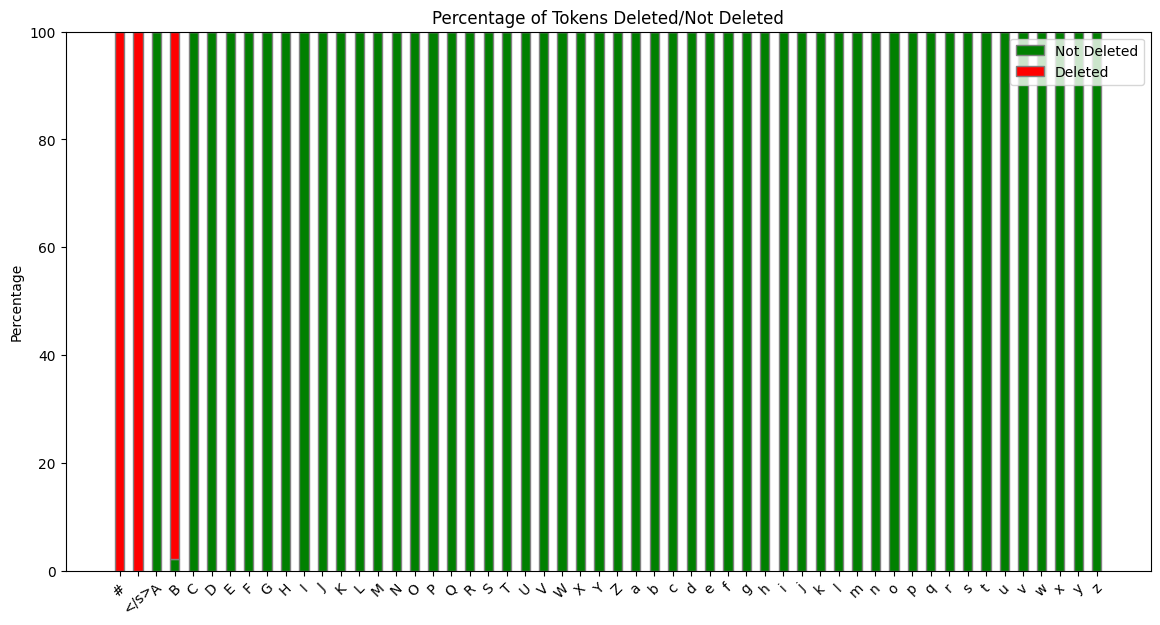

100%|█████████▉| 1000/1001 [00:00<00:00, 40212.30it/s]


#DXlHnwGXlABCDukLABCOMAciYvJTcQXWSdIVABCeGABCCCABCfWABCgPlSEJKA</s>
#HeeqhRMQxJABCsNqfMbNLiWlABCzRdddpsOeEpRlaLmoRbpBuGNvlznzWZyHoI</s>
#ocuAZHABCBijbFSHMiqHtDYOIABCmlQeQcVpIrLYlPmPGVjsetIeAkPPaNZhNj</s>
#OSwEgLbUABCLABCmQMSQABCzzlbEPSEmawFFRuIObDMRQNAPABCqhhABCbPRQs</s>
#ABCcYapqxhAPIABChABCDBQYkjiATACABCkEeRiYABCqrARcrnRCrhMYwEBxXt</s>
#jABCWGaMTrvatuKUABCcMefQabpNUHsiuAMaOdmiIRpXVZAvjEJAABCzJEusUo</s>
#OmABCpxnOPwrOZsGTJMcqNldbABCImlQPPEaTbmJABCvMvXYMuMkfqABCABCYL</s>
#JrwinDABCZeVfsOWXMenIUEajYyfqboxxsBWPknaWnyNuJEorIHcAAbABCAhFf</s>
#VABCKqhjqlgMUbXnfvYzSqRVABCUsABCAeJalhzxABCApECgicHJZhqaABCuNS</s>
#pQkySCKwEoloLXdAABCEQABCZybpVlxvABCaABCepMABCsEHMEIjoDIpBHhQOC</s>
#oyRDfJREmGnDVwwDQoxNOZKEGYhFDAfLtGZYuYDqXgedbFTABCjDLiDKPHQmrV</s>
#mABCiSVABCABCmwgsOuOABCzEiBABCpNxBCwkjdaABClvbABCKzyYgxxsBABCj</s>
#vFdABCVZbIslFpdssCXVcXCqjXTotATqzwFBzDqtrKYABCUABCIecWgReXIiFH</s>
#LASABCABCNHSoABCrZHqSzpOAASUEVYFNttclMABCqiKJABCuYPdyoDpRdHHwg</s>
#GABCrfRwywiABCVABCXaJhABCyXpIGABCNVABCABCXHxLJA

100%|█████████▉| 1000/1001 [00:00<00:00, 51069.71it/s]


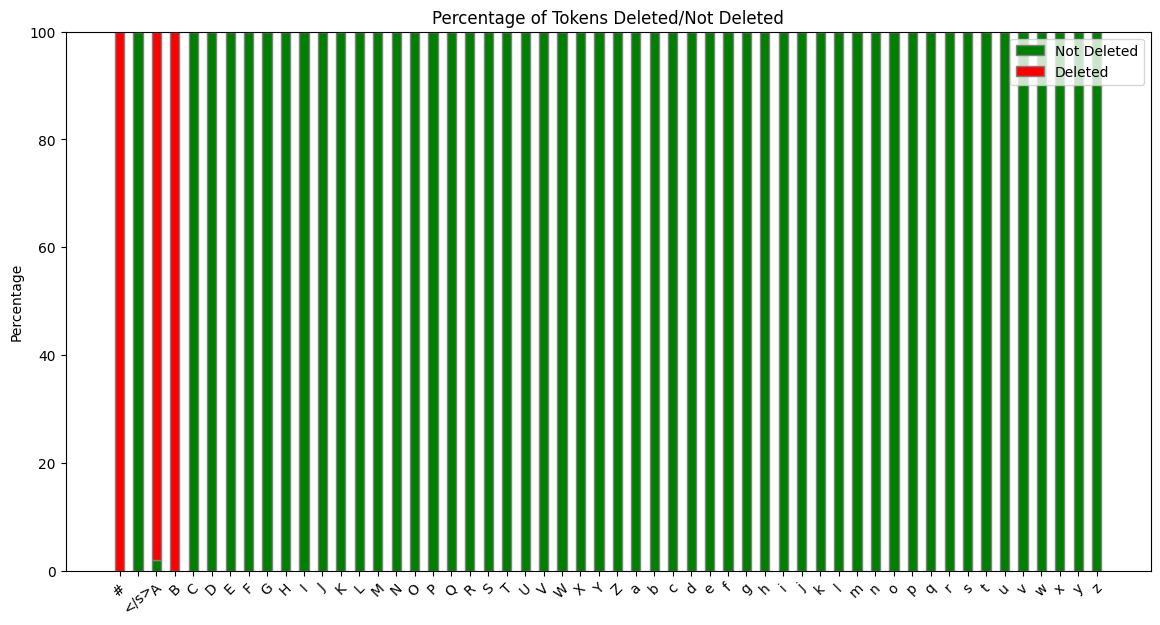

In [5]:
pctrl_and_seeds = [(10, 39), (20, 593), (30, 75)]
for pctrl, seed in pctrl_and_seeds:
  print_deletion_patterns(f"merge_ABC_pctrl{pctrl}%", task="merge_ABC", seed=seed, ckpt=30000)
  display_deleted_tokens_plot(f"merge_ABC_pctrl{pctrl}%", task="merge_ABC", seed=seed, ckpt=30000)